Adam Abate
CS 520 - Neural Networks for Machine Learning
2/24/19

In [58]:
import random

class Perceptron:
    
    def __init__(self):
        
        self.w0 = 0.1
        self.w1 = 0.1
        self.w2 = 0.1

    def predict(self, x1, x2):
        
        prediction = self.w0 + self.w1*x1 + self.w2*x2
        
        if (prediction < 0):
            return -1
        
        if (prediction > 0):
            return 1
        
    def isMisclassified(self, data):
        
        #Set a counter for the number of correctly classified data points
        numCorrClass = 0
        
        for i in range(0, len(data)):
            
            prediction = self.predict(data[i][0], data[i][1])
            
            #If a single data point is misclassified, we stop checking -> return True
            if (prediction != data[i][2]):
                break
            
            else:
                numCorrClass += 1
        
        #If all data points have been correctly classified, misclassified is False
        if (numCorrClass == len(data)):
            return False
        
        else:
            return True
        
    
    def PLA(self, data):
    
        misclassified = True
    
        while (misclassified == True):
            
            i = random.randint(0, len(data)-1)
            
            #First two columns of data are x1 and x2, respectively
            prediction = self.predict(data[i][0], data[i][1])
        
            #Third column of data is y         
            if (prediction == 1 and data[i][2] == -1):
                #Adjusted weights are initial weights plus target output times input
                #print("Adjusted weight for data point "+ str(i))
                self.w0 += data[i][2]*1
                self.w1 += data[i][2]*data[i][0]
                self.w2 += data[i][2]*data[i][1]
            
            elif (prediction == -1 and data[i][2] == 1):
                #Adjusted weights are initial weights plus target output times input
                #print("Adjusted weight for data point "+ str(i))
                self.w0 += data[i][2]*1
                self.w1 += data[i][2]*data[i][0]
                self.w2 += data[i][2]*data[i][1]
            
            misclassified = self.isMisclassified(data)
            
        
    def getDecisionBoundary(self):
        
        return [self.w0, self.w1, self.w2]

In [59]:
#RANDOMLY GENERATE TARGET FUNCTION
#Three dimensions of tf correspond to bias, w1, and w2 of target function
w = [random.uniform(-10,10), random.uniform(-10,10), random.uniform(-10,10)]
w

[-1.9445071172363466, -2.819703349931486, 6.634823972921652]

In [60]:
#RANDOMLY GENERATE DATA AROUND TARGET FUNCTION
posCount = 0
negCount = 0
data = []

while (posCount < 10):
    
    x1 = random.uniform(0, 10)
    x2 = random.uniform(0, 10)
    
    if (w[0] + x1*w[1] + x2*w[2] > 0):
        posCount += 1
        data.append([x1, x2, 1])

while (negCount < 10):
    
    x1 = random.uniform(0, 10)
    x2 = random.uniform(0, 10)
    
    if (w[0] + x1*w[1] + x2*w[2] < 0):
        negCount += 1
        data.append([x1, x2, -1])

data

[[7.167595708384299, 5.993739599413718, 1],
 [2.0521993907390836, 1.855528264335644, 1],
 [3.604668550362721, 8.153099460526153, 1],
 [0.13576842577983972, 7.664990253638072, 1],
 [7.624544069529184, 5.367129284027828, 1],
 [3.8436316903066334, 4.906389401695874, 1],
 [2.340609344908521, 3.840432557746929, 1],
 [4.531832468486019, 9.483313369629505, 1],
 [8.036834692689908, 6.965047045069853, 1],
 [1.1241969771759153, 4.90018101761982, 1],
 [8.971574739587199, 1.7791293871488734, -1],
 [6.874602663389665, 2.3042611498987977, -1],
 [6.1887160542846145, 0.6031027164804492, -1],
 [8.27615638400053, 1.107727312697806, -1],
 [7.766277578921241, 1.8191973042947118, -1],
 [9.521363917421912, 2.2134199990994907, -1],
 [4.621201290405828, 2.0273882191190964, -1],
 [6.357564679720449, 2.205912566804007, -1],
 [7.816561959944868, 2.859094271802125, -1],
 [4.772460757059097, 0.7194306077884904, -1]]

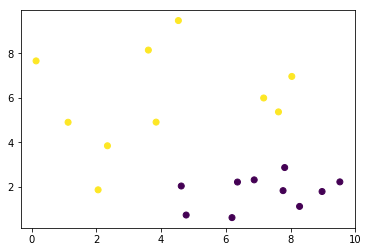

In [61]:
#DISPLAY DATA AND THEIR CLASSIFICATIONS
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data1 = np.array(data)

plt.scatter(data1[:,0], data1[:,1], c=data1[:,2])
#y = []
#x = []
#for i in range(0, 10):
#    x.append(i)
#    y.append()
    
plt.plot()
plt.show()

In [62]:
#TRAIN THE PERCEPTRON
perceptron = Perceptron()
perceptron.PLA(data)
print(perceptron.getDecisionBoundary())

[0.10000000000000009, -6.614295410649202, 12.672579643798004]


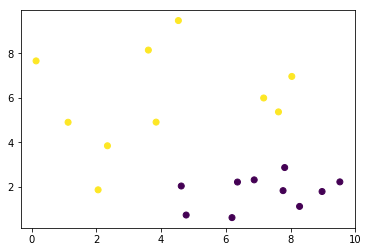

In [63]:
#MAKE AND PLOT PERCEPTRON PREDICTIONS
data2 = np.array(data)

for i in range(len(data2)):
    data2[i,2] = perceptron.predict(data2[i,0], data2[i,1])

#If this plot looks like the one above, all points have been classified correctly.
plt.scatter(data2[:,0], data2[:,1], c=data2[:,2])